# Instructions

* Due date is Wednesday 10/02 2pm (we will do solutions in class, so you must submit before the class).

* Submit in two parts:
  * (Q1) Write the derivation on paper, take a photo or scan it, upload photo/pdf, **online**.
  
    Optional: You can also write out latex in this colab and the colab will convert it into nice formulae (see [latex tutorial](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb)) and submit along with Q2 **online**.
    
  * (Q2) Submit copy of this colab with your code and output saved, **online**.


## Q1 Gradient Descent (10 points)

Consider a single layer of 2 perceptrons with input vector $x = (x_1, \ldots, x_n)$ and two scalar outputs $(p_1, p_2)$ with following equations:

$$p_i = \sum_j w_{ij} x_j$$

Now given a particular input vector $x$, its two labels $\{ y_1, y_2 \}$ and particular prediction $(p_1, p_2)$, suppose the loss function is defined as:

$$L(w) = 0.9 (p_1 - y_1)^2 + 0.1 \sum_j w_{1j}^2 + 0.1 (p_2 - y_2)^2 + 0.9 \sum_j w_{2j}^2$$




Show derivation of the

$$\frac{\partial L}{\partial w_{ij}}$$

for all i, j.


## Q2 Keras Functional API (10 points)

* Get the [fashion_mnist](https://keras.io/api/datasets/fashion_mnist/) dataset and build a classifier using the functional API that implements following model diagram. For the "Norm" layer, you can use LayerNormalization. For the "Output", use activation='softmax'.

* Train the classifier for 30 epochs on the train set.

* Evaluate the classifier on the test set and it should output SparseCategoricalAccuracy.

* For aspects of model that are not specified here, make reasonable assumptions based on the [keras_intro.ipynb](https://colab.research.google.com/drive/1T2b_9SuwIOnhyHRE-ExnQFi8OmYhBSzR) done in the class.


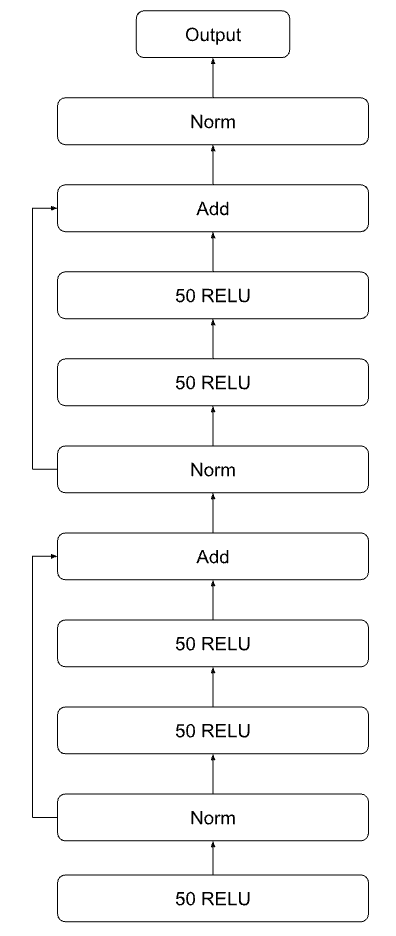

In [ ]:

#First im going to import everything

In [ ]:
#These are my two reference I use from the lecture link
#https://keras.io/guides/functional_api/
#https://keras.io/api/datasets/fashion_mnist/


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Flatten, LayerNormalization, Add
from tensorflow.keras.models import Model

#First and foremost lets understand the logic behind this whole work
#What does the professor want from us?

#We know that Keras Func api help us build hard neural network, it can deal with multiple input and share layers


#The whole idea is "lets look at this image of clothing and tell what it is"

(X_full_train, y_full_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

#So At first I made a huge mistake, because I relize there two dense layer right? That is between first nom..

#I was also concern it might affect the training dynamic

X_full_train = X_full_train / 255.0
X_test = X_test / 255.0


#Im putting the valid set and preparing it
X_valid = X_full_train[:5000]

y_valid = y_full_train[:5000]
X_train = X_full_train[5000:]

y_train = y_full_train[5000:]



# the reason why I use 28,28 is because the link you provide clearly use 28.

inp = Input(shape=(28, 28))
#I flatten the 2d to 1d,i had problem of this but I use reference in discord
flat = Flatten()(inp)



dlayer_1 = Dense(50, activation='relu')(flat)

norm_1 = LayerNormalization()(dlayer_1)

# I add a second Dense layer, again with 50 units and ReLU activation
dlayer_2 = Dense(50, activation='relu')(norm_1)

dlayer_3 = Dense(50, activation='relu')(dlayer_2)


#this is 100% needed because we can skip layers
skip = Add()([norm_1, dlayer_3])

norm_2 = LayerNormalization()(skip)


#summing up to 1
out = Dense(10, activation='softmax')(norm_2)

model = Model(inputs=inp, outputs=out)

#between the norm and adds you should hjave two 50 RELU layers not just one

#for optimizer i used tf.keras.optimizers.RMSprop()

model.compile(optimizer=tf.keras.optimizers.RMSprop(),


              loss='sparse_categorical_crossentropy',


              metrics=['sparse_categorical_accuracy'])

# I train the model using the training data and validateset
#please remember 30 epochs
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"The test accuracy result: {test_accuracy:.3f}")

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6289 - sparse_categorical_accuracy: 0.7717 - val_loss: 0.4319 - val_sparse_categorical_accuracy: 0.8344
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3873 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.3502 - val_sparse_categorical_accuracy: 0.8692
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3453 - sparse_categorical_accuracy: 0.8743 - val_loss: 0.3586 - val_sparse_categorical_accuracy: 0.8710
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3256 - sparse_categorical_accuracy: 0.8793 - val_loss: 0.3222 - val_sparse_categorical_accuracy: 0.8836
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3070 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.3377 - val_sparse_categorical_accuracy: 0.8790
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2952 - sparse_categorical_accuracy: 0.8905 - val_loss: 0.3292 - val_sparse_categorical_accuracy: